In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/tweet.csv")
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [ ]:
lab_to_sentiment = {0:0, 4:1}
def label_decoder(label):
  return lab_to_sentiment[label]
data.target = data.target.apply(lambda x: label_decoder(x))
data.head()

,target,TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew


Text(0.5, 1.0, 'Dataset labels distribuition')

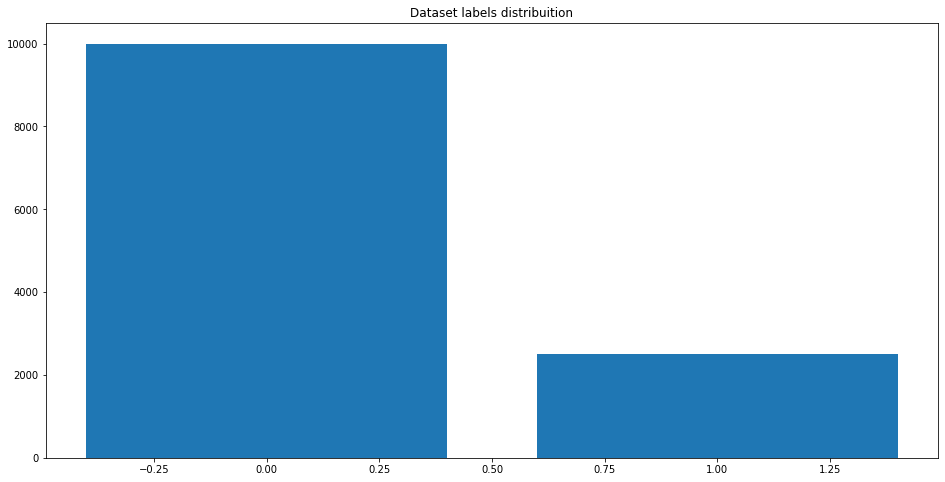

In [ ]:
from collections import Counter
target_cnt = Counter(data.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
print("Dataset size:", len(data))

Dataset size: 12499


In [ ]:
data.head()

,target,TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew


# Data Cleaning

Removing Twitter Handles (@user)

In [ ]:
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew,Kwesidei not the whole crew


Removing links

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew,Kwesidei not the whole crew


Removing Punctuations, Numbers, and Special Characters

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he can t update his Facebook by texting it and might cry as a result School today also Blah
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,Kenichan I dived many times for the ball Managed to save The rest go out of bounds
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",nationwideclass no it s not behaving at all i m mad why am i here because I can t see you all over there
4,0,@Kwesidei not the whole crew,Kwesidei not the whole crew


In [ ]:
print(data['target'].unique())

[0 1]


Remove stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords=nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset update facebook texting might cry result school today also blah
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,kenichan dived many times ball managed save rest go bounds
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",nationwideclass behaving mad see
4,0,@Kwesidei not the whole crew,kwesidei whole crew


Text Tokenization and Normalization

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,"[upset, update, facebook, texting, might, cry, result, school, today, also, blah]"
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,"[kenichan, dived, many, times, ball, managed, save, rest, go, bounds]"
2,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","[nationwideclass, behaving, mad, see]"
4,0,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"


In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,"[upset, updat, facebook, text, might, cri, result, school, today, also, blah]"
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,"[kenichan, dive, mani, time, ball, manag, save, rest, go, bound]"
2,0,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","[nationwideclass, behav, mad, see]"
4,0,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"


Now let’s stitch these tokens back together

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset updat facebook text might cri result school today also blah
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,kenichan dive mani time ball manag save rest go bound
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",nationwideclass behav mad see
4,0,@Kwesidei not the whole crew,kwesidei whole crew


Removing small words

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset updat facebook text might result school today also blah
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,kenichan dive mani time ball manag save rest bound
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",nationwideclass behav
4,0,@Kwesidei not the whole crew,kwesidei whole crew


Data Vizualisation

In this section we will visualize the tweets using wordclouds.
A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

What are the most common words in the entire dataset?

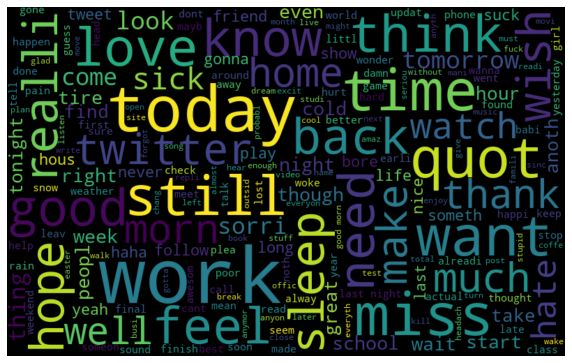

In [ ]:
all_words = ' '.join([text for text in data['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

What are the most common words in the dataset for Positive and Depressive tweets, respectively?

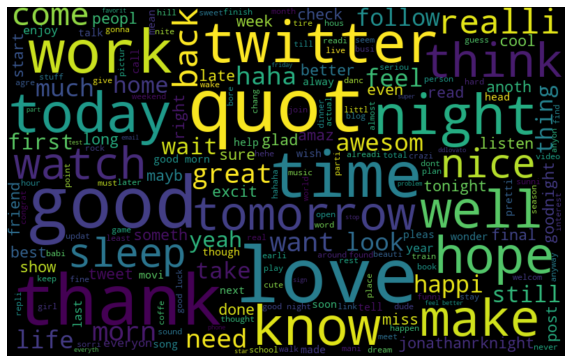

In [ ]:
positive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

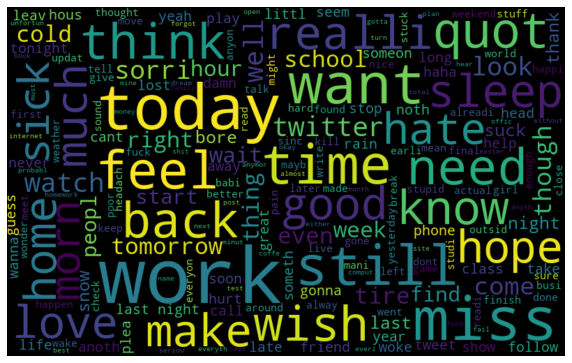

In [ ]:
depressive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Model building

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(12499, 13879)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

Model Training

In [ ]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.8156


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
target_names = y_test
class_labels = ['positive','negative']
report = classification_report(y_test,prediction_xgb, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

    positive       0.83      0.97      0.89      2000
    negative       0.62      0.20      0.30       500

    accuracy                           0.82      2500
   macro avg       0.73      0.58      0.60      2500
weighted avg       0.79      0.82      0.78      2500



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, prediction_xgb)
print(CR)
print('\n')




confusion matrix


[[1939   61]
 [ 400  100]]




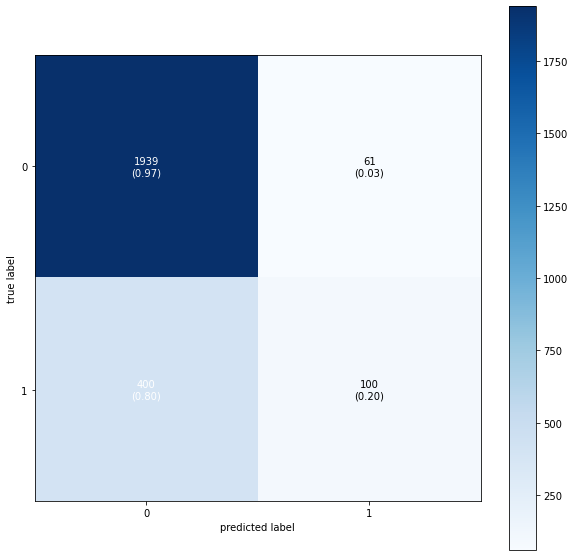

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.7964


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
target_names = y_test
class_labels = ['positive','negative']
report = classification_report(y_test,prediction_rf, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

    positive       0.83      0.93      0.88      2000
    negative       0.48      0.25      0.33       500

    accuracy                           0.80      2500
   macro avg       0.66      0.59      0.60      2500
weighted avg       0.76      0.80      0.77      2500



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, prediction_rf)
print(CR)
print('\n')



confusion matrix


[[1868  132]
 [ 377  123]]




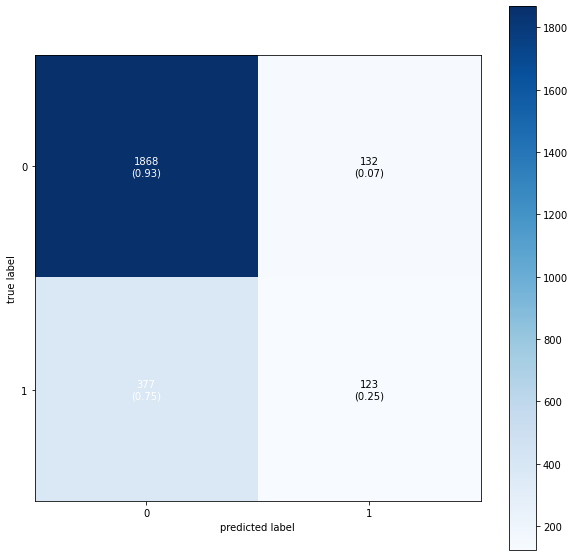

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.8208


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
target_names = y_test
class_labels = ['positive','negative']
report = classification_report(y_test,prediction_lr, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

    positive       0.84      0.96      0.90      2000
    negative       0.63      0.26      0.37       500

    accuracy                           0.82      2500
   macro avg       0.73      0.61      0.63      2500
weighted avg       0.80      0.82      0.79      2500



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, prediction_lr)
print(CR)
print('\n')



confusion matrix


[[1923   77]
 [ 371  129]]




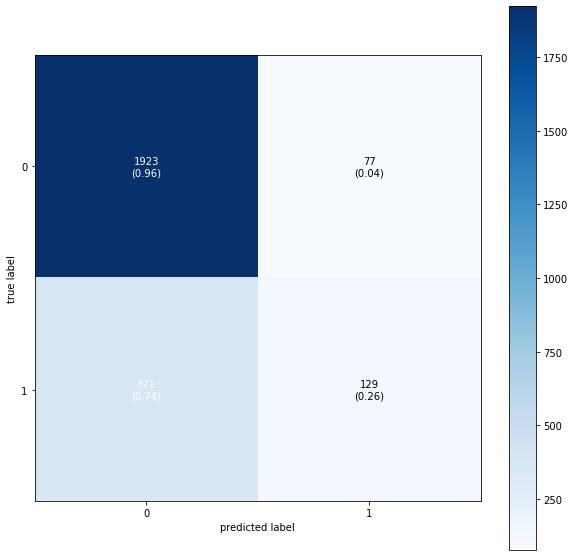

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

0.8112


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
target_names = y_test
class_labels = ['positive','negative']
report = classification_report(y_test,prediction_svc, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

    positive       0.81      0.99      0.89      2000
    negative       0.72      0.09      0.16       500

    accuracy                           0.81      2500
   macro avg       0.77      0.54      0.53      2500
weighted avg       0.79      0.81      0.75      2500



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, prediction_svc)
print(CR)
print('\n')



confusion matrix


[[1982   18]
 [ 454   46]]




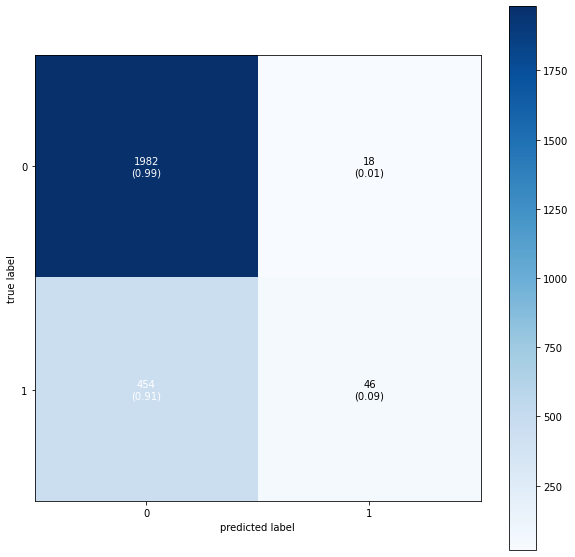

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
clf.fit(X_train, y_train)
prediction_sgd = clf.predict(X_test)
print(accuracy_score(prediction_sgd,y_test))

0.7924


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
target_names = y_test
class_labels = ['positive','negative']
report = classification_report(y_test,prediction_sgd, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

    positive       0.84      0.92      0.88      2000
    negative       0.47      0.28      0.35       500

    accuracy                           0.79      2500
   macro avg       0.65      0.60      0.61      2500
weighted avg       0.76      0.79      0.77      2500



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, prediction_sgd)
print(CR)
print('\n')



confusion matrix


[[1840  160]
 [ 359  141]]




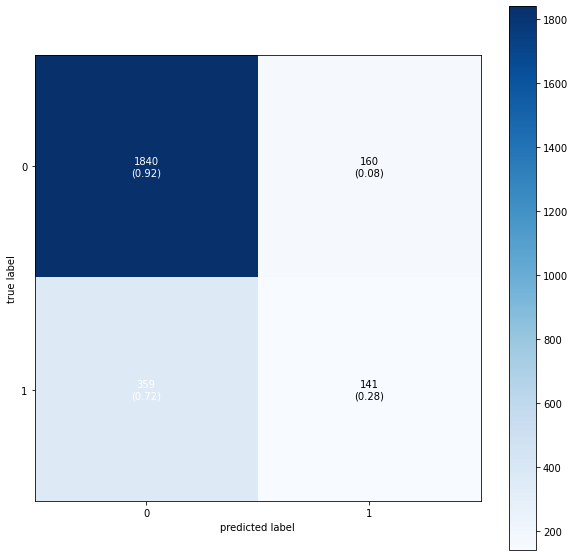

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
prediction_tree = clf.predict(X_test)
print(accuracy_score(prediction_tree,y_test))

0.7624


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
target_names = y_test
class_labels = ['positive','negative']
report = classification_report(y_test,prediction_tree, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

    positive       0.84      0.88      0.85      2000
    negative       0.38      0.31      0.34       500

    accuracy                           0.76      2500
   macro avg       0.61      0.59      0.60      2500
weighted avg       0.75      0.76      0.75      2500



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, prediction_tree)
print(CR)
print('\n')



confusion matrix


[[1750  250]
 [ 344  156]]




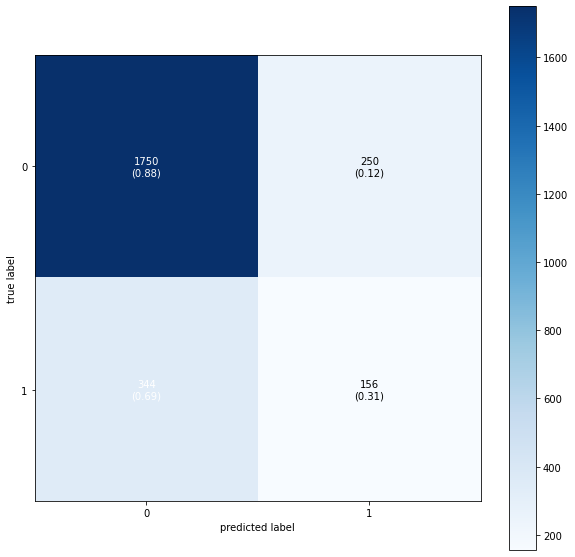

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('tw1.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/tw1.ipynb to pdf
[NbConvertApp] Support files will be in tw1_files/
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Making directory ./tw1_files
[NbConvertApp] Writing 79183 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[Nb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'